In [182]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas
import numpy as np

In [183]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [184]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [185]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_scaled = StandardScaler().fit_transform(market_data_df)


In [186]:
# Create a DataFrame with the scaled data
crypto_scaled_df = pd.DataFrame(
    crypto_scaled, columns=market_data_df.columns
)

# Copy the crypto names from the original data
crypto_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
crypto_scaled_df = crypto_scaled_df.set_index("coin_id")

# Display sample data
crypto_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [187]:
# Create a list with the number of k-values to try 
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    kmodel = KMeans(n_clusters=i,n_init="auto")
    kmodel.fit(crypto_scaled_df)
    inertia.append(kmodel.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
# Display sample data
elbow_data

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)

c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,167.381010
3,4,79.022435
4,5,65.302379
5,6,64.296264
6,7,48.959361
7,8,41.329897
8,9,38.999164
9,10,31.185873


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

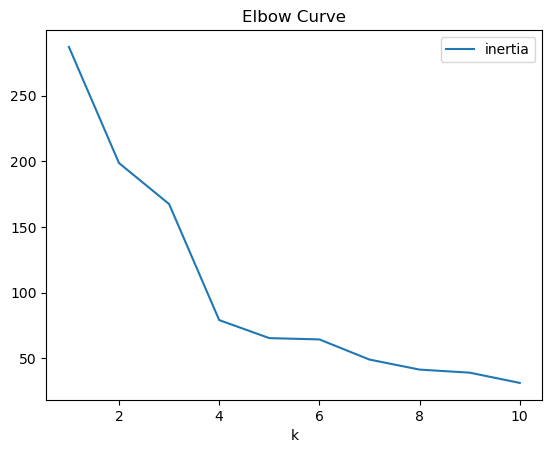

In [188]:
# Plot a line chart with all the inertia values computed with the different values of k

# Set the x-axis to "k"
# Set the y-axis to "inertia"
# Set the x and y axis titles

elbow_df.plot(x="k", y="inertia", title="Elbow Curve")

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [189]:
# Initialize the K-Means model using the best value for k
# Use 4 as the k value
model = KMeans(n_clusters=4)


In [190]:
# Fit the K-Means model using the scaled data
model.fit(crypto_scaled_df)


c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [191]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(crypto_scaled_df)
# View the resulting array of cluster values.
print(crypto_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [192]:
# Create a copy of the DataFrame
clustered_df = crypto_scaled_df.copy()

In [193]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df = clustered_df.assign(clusters= crypto_clusters)
# Display sample data
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: title={'center': 'Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

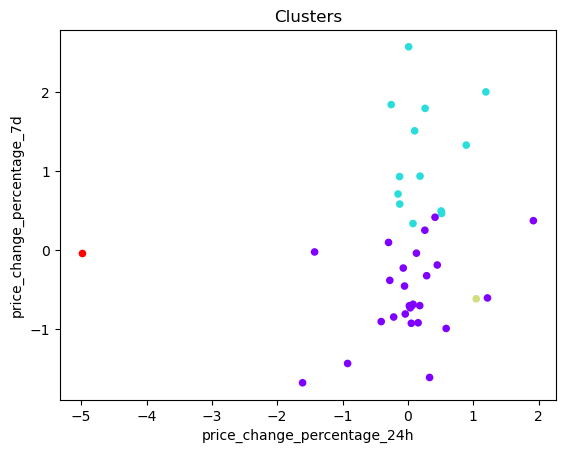

In [194]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="clusters", colormap="rainbow", colorbar=False, title="Clusters")

### Optimize Clusters with Principal Component Analysis.

In [195]:
# Create a PCA model instance and set `n_components=3`.
# Use the `PCA` model from scikit-learn to reduce the dimensions of the scaled DataFrame.
pca = PCA(n_components=3)


In [196]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(crypto_scaled_df)

# View the first five rows of the DataFrame.
crypto_pca[:5]



array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [197]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

In [198]:
# Total explained variance of the three components
total_explained_variance = np.sum(pca.explained_variance_ratio_)
total_explained_variance

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%


In [199]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PCA1", "PCA2", "PCA3"])

# Creating a DataFrame with the PCA data
crypto_pca_df["coin_id"] = market_data_df.index
crypto_pca_df = crypto_pca_df.set_index("coin_id")

# Set the coinid column as index
crypto_pca_df.head()

# Display sample data
crypto_pca_df.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [200]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca=list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(crypto_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_pca': k_pca , 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_pca.head(10)

c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

,k_pca,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668325
9,10,10.484890


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

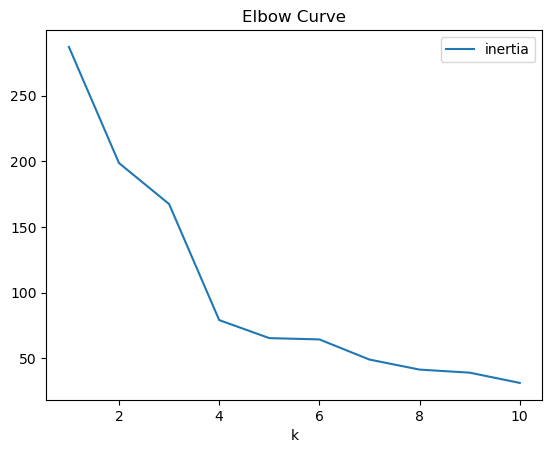

In [201]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia", title="Elbow Curve")



#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** According to the value, the best value for 'k' when using the PCA data is 2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes the original value for 'k' was 4 and the best value PCA value is 2

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [202]:
# Initialize the K-Means model using the best value for k
# Use 4 as the k value
model_pca = KMeans(n_clusters=4)

In [203]:
# Fit the K-Means model using the PCA data
model_pca.fit(crypto_pca_df)

c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [204]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters_pca = model_pca.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(crypto_clusters_pca)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [205]:
# Create a copy of the DataFrame with the PCA data
clustered_df_pca = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_df_pca["crypto_clusters"] = crypto_clusters_pca

# Display sample data
clustered_df_pca.head()


,PCA1,PCA2,PCA3,crypto_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [206]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"` and `by="crypto_clusters"`.
# Use "rainbow" for the color to better visualize the data.
# Use the `hvplot` function from the `hvplot.pandas` module to create a scatter plot with the PCA data.
# Set the x-axis to "PCA1"
# Set the y-axis to "PCA2"
# Set the color to "crypto_clusters"
# Set the colormap to "rainbow"
# Set the title to "Clusters"
# Use the `by` parameter to separate the clusters by color.
clustered_df_pca.hvplot.scatter(x="PCA1", y="PCA2", by="crypto_clusters", title="Clusters")



:NdOverlay   [crypto_clusters]
   :Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [207]:
# Use the columns from the original scaled DataFrame as the index.
# Use the `inverse_transform` function from the PCA model to return the original data.
# Create a DataFrame with the original data.
# Set the index to the original index.
# Display sample data
crypto_pca_inverse = pca.inverse_transform(crypto_pca)
crypto_pca_inverse


array([[ 4.51164728e-01,  6.16782155e-01,  6.22286602e-01,
         2.74851481e-01,  6.54907063e-03, -3.15363105e-01,
        -3.71301408e-01],
       [ 1.46690282e-01,  9.01762825e-01,  5.85022932e-01,
        -3.20540238e-03, -2.92166088e-01, -2.21845004e-01,
        -1.28977699e-01],
       [ 2.60667821e-01, -4.99366234e-01, -3.11203968e-01,
        -6.08259311e-02,  2.02004769e-02, -2.87607963e-01,
        -3.55911539e-01],
       [ 2.21692777e-01, -3.79645173e-01, -2.83450946e-01,
        -1.28477692e-01, -7.46839245e-02, -3.05700527e-01,
        -3.35466921e-01],
       [ 8.06674439e-01,  2.04767386e+00,  1.76374140e+00,
         5.87795159e-01, -1.57010688e-01, -5.57770068e-01,
        -5.74315278e-01],
       [ 5.36591122e-01,  1.00201380e+00,  1.03608279e+00,
         5.35458398e-01,  1.46559027e-01, -2.36608127e-01,
        -3.33649453e-01],
       [-2.49477662e-01,  2.40573081e+00,  1.27872455e+00,
        -3.12548842e-01, -9.48220908e-01, -1.40488698e-01,
         2.6499227

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    